In [166]:
# normal stuff
from dotenv import load_dotenv
import os
import requests
import json
import pandas as pd
import datetime as dt
from pathlib import Path
import numpy as np

# stuff for analysis
import operator
import collections
from collections import Counter
from sklearn.linear_model import LinearRegression

# stuff for hypothesis
import hvplot.pandas
import plotly.express as px
from bokeh.models.formatters import DatetimeTickFormatter

# stuff for mapbox and dashboard

In [167]:
load_dotenv() 

True

In [168]:
api_key = os.getenv("ZIPCODE_API_KEY")

In [220]:
# Entering in variables, could make this an input feature if we have time
zip_code = 77002
distance = 5
units = "miles"
url = f"http://www.zipcodeapi.com/rest/{api_key}/radius.json/{zip_code}/{distance}/{units}"

In [221]:
response_data = requests.get(url)
data = response_data.json()
print(json.dumps(data, indent=4))

{
    "zip_codes": [
        {
            "zip_code": "77021",
            "distance": 4.071,
            "city": "Houston",
            "state": "TX"
        },
        {
            "zip_code": "77030",
            "distance": 4.082,
            "city": "Houston",
            "state": "TX"
        },
        {
            "zip_code": "77005",
            "distance": 4.396,
            "city": "Houston",
            "state": "TX"
        },
        {
            "zip_code": "77023",
            "distance": 3.714,
            "city": "Houston",
            "state": "TX"
        },
        {
            "zip_code": "77004",
            "distance": 2.211,
            "city": "Houston",
            "state": "TX"
        },
        {
            "zip_code": "77046",
            "distance": 4.39,
            "city": "Houston",
            "state": "TX"
        },
        {
            "zip_code": "77098",
            "distance": 3.418,
            "city": "Houston",
            "state": "T

In [277]:
zip_code = []
city = []

for line in data["zip_codes"]:

    new_zip_code = int(line["zip_code"])
    zip_code.append(new_zip_code)
    
    new_city = line["city"]
    city.append(new_city)

In [278]:
zip_code_df = pd.DataFrame()
zip_code_df['zip_code']  = zip_code
zip_code_df['City']  = city

In [279]:
zip_code

[77021,
 77030,
 77005,
 77023,
 77004,
 77046,
 77098,
 77027,
 77006,
 77011,
 77003,
 77276,
 77285,
 77010,
 77019,
 77002,
 77001,
 77052,
 77202,
 77203,
 77204,
 77205,
 77206,
 77207,
 77208,
 77209,
 77210,
 77212,
 77213,
 77215,
 77216,
 77217,
 77218,
 77219,
 77220,
 77221,
 77222,
 77223,
 77224,
 77225,
 77226,
 77227,
 77228,
 77229,
 77230,
 77231,
 77233,
 77234,
 77235,
 77236,
 77237,
 77238,
 77240,
 77241,
 77242,
 77243,
 77244,
 77245,
 77248,
 77249,
 77251,
 77252,
 77253,
 77254,
 77255,
 77256,
 77257,
 77258,
 77259,
 77261,
 77262,
 77263,
 77265,
 77266,
 77267,
 77268,
 77269,
 77270,
 77271,
 77272,
 77273,
 77274,
 77275,
 77277,
 77279,
 77280,
 77282,
 77284,
 77287,
 77288,
 77289,
 77290,
 77291,
 77292,
 77293,
 77297,
 77299,
 77097,
 77296,
 77298,
 77201,
 77007,
 77020,
 77009,
 77008,
 77026]

In [224]:
def filter_zip_code(zip_codes_list, df, new_dataframe):
    for zip_code_numbers in zip_codes_list:
        if zip_code_numbers in df:
            data_adding = df.loc[:, zip_code_numbers]
            new_dataframe = new_dataframe.append(data_adding)
    return new_dataframe  

In [225]:
# importing the data
clean_path = Path("../resources/Vu/Tax_Data/cleaned_tax_FINALs.csv")

clean_tax = pd.read_csv(clean_path)

clean_tax = clean_tax.rename({'Zip Code': 'zip_code'}, axis=1)

clean_tax = clean_tax.astype({'zip_code': 'int'})

clean_tax.drop(columns = "Size of adjusted gross income", inplace = True)

multi_index_tax = clean_tax.groupby(["zip_code", "date"]).sum()


# creating a new dataframe for each of the columns
number_of_returns_df = pd.pivot_table(multi_index_tax, index = "date", values = "Number of returns", columns = "zip_code")

taxable_income_df = pd.pivot_table(multi_index_tax, index = "date", values = "Taxable income", columns = "zip_code")

income_tax_df = pd.pivot_table(multi_index_tax, index = "date", values = "Income tax", columns = "zip_code")

mortgage_tax_df = pd.pivot_table(multi_index_tax, index = "date", values = "Mortgage", columns = "zip_code")

charity_tax_df = pd.pivot_table(multi_index_tax, index = "date", values = "Charity", columns = "zip_code")

real_estates_tax_df = pd.pivot_table(multi_index_tax, index = "date", values = "Real Estates", columns = "zip_code")



# Setting index to datetime and sorting index(date)
number_of_returns_df.index = pd.to_datetime(number_of_returns_df.index)
number_of_returns_df.sort_index(inplace=True)

taxable_income_df.index = pd.to_datetime(taxable_income_df.index)
taxable_income_df.sort_index(inplace=True)

income_tax_df.index = pd.to_datetime(income_tax_df.index)
income_tax_df.sort_index(inplace=True)

mortgage_tax_df.index = pd.to_datetime(mortgage_tax_df.index)
mortgage_tax_df.sort_index(inplace=True)

charity_tax_df.index = pd.to_datetime(charity_tax_df.index)
charity_tax_df.sort_index(inplace=True)

real_estates_tax_df.index = pd.to_datetime(real_estates_tax_df.index)
real_estates_tax_df.sort_index(inplace=True)

In [226]:
permits_filepath = Path("../resources/dan/Permit_Data/permit_data.csv")

permits_df = pd.read_csv(permits_filepath)

permits_df.dropna(inplace=True)

permits_df = permits_df.astype({'zip_code': 'int64'})

permits_df.set_index(pd.to_datetime(permits_df['date'], format='%Y%m', infer_datetime_format=True), inplace=True)

permits_df.drop('date', axis=1, inplace=True)

permit_counts = permits_df.groupby(["zip_code", "date"]).sum()

permits_by_zip = pd.pivot_table(permit_counts, index = "date", values = "count", columns = "zip_code")

# permits_by_zip.index = permits_by_zip.index.to_period('M')

permits_by_zip = permits_by_zip.groupby(permits_by_zip.index).sum()

permits_by_zip.fillna(0, inplace=True)

permits_by_zip = permits_by_zip.astype(int)


In [227]:
csvpath = Path("../resources/Jack/Texas_Pricing_Data.csv")

pricing_data_df = pd.read_csv(csvpath)

pricing_data_df.set_index(pd.to_datetime(pricing_data_df['month_date_yyyymm'], format='%Y%m', infer_datetime_format=True), inplace=True)

pricing_data_df.index.rename('date', inplace=True)

pricing_data_df.index.rename('date', inplace=True)

pricing_data_df.sort_values(by=['postal_code','date'], inplace=True)

pricing_data_df['pct_price_change'] = 0

pricing_data_df['pct_price_sqft_change'] = 0

pricing_data_df['pct_price_sqft_change'] = pricing_data_df['median_listing_price_per_square_feet'].pct_change()

pricing_data_df.index.rename('date', inplace=True)

median_list_sqft_df = pd.pivot_table(pricing_data_df, index='date', columns = 'postal_code', values = 'median_listing_price_per_square_feet')

median_list_sqft_df_pct_change = median_list_sqft_df.pct_change()

active_listings_df = pd.pivot_table(pricing_data_df, index='date', columns = 'postal_code', values = 'active_listing_count')

new_listing_df = pd.pivot_table(pricing_data_df, index='date', columns = 'postal_code', values = 'new_listing_count')

average_listing_price_df = pd.pivot_table(pricing_data_df, index='date', columns = 'postal_code', values = 'average_listing_price')

pending_ratio_df = pd.pivot_table(pricing_data_df, index='date', columns = 'postal_code', values = 'pending_ratio')

In [228]:
filtered_median_list_sqft_df = pd.DataFrame()
filtered_median_list_sqft_df = filter_zip_code(zip_code, median_list_sqft_df, filtered_median_list_sqft_df)
filtered_median_list_sqft_df.fillna(0, inplace = True)
filtered_median_list_sqft_df = filtered_median_list_sqft_df.transpose()


filtered_median_list_sqft_df_pct_change = pd.DataFrame()
filtered_median_list_sqft_df_pct_change = filter_zip_code(zip_code, median_list_sqft_df_pct_change, filtered_median_list_sqft_df_pct_change)
filtered_median_list_sqft_df_pct_change.fillna(0, inplace = True)
filtered_median_list_sqft_df_pct_change = filtered_median_list_sqft_df_pct_change.transpose()

filtered_active_listings_df = pd.DataFrame()
filtered_active_listings_df = filter_zip_code(zip_code, active_listings_df, filtered_active_listings_df)
filtered_active_listings_df.fillna(0, inplace = True)
filtered_active_listings_df = filtered_active_listings_df.transpose()

filtered_new_listing_df = pd.DataFrame()
filtered_new_listing_df = filter_zip_code(zip_code, new_listing_df, filtered_new_listing_df)
filtered_new_listing_df.fillna(0, inplace = True)
filtered_new_listing_df = filtered_new_listing_df.transpose()

filtered_average_listing_price_df = pd.DataFrame()
filtered_average_listing_price_df = filter_zip_code(zip_code, average_listing_price_df, filtered_average_listing_price_df)
filtered_average_listing_price_df.fillna(0, inplace = True)
filtered_average_listing_price_df = filtered_average_listing_price_df.transpose()

filtered_pending_ratio_df = pd.DataFrame()
filtered_pending_ratio_df = filter_zip_code(zip_code, pending_ratio_df, filtered_pending_ratio_df)
filtered_pending_ratio_df.fillna(0, inplace = True)
filtered_pending_ratio_df = filtered_pending_ratio_df.transpose()


In [229]:
filtered_permits_by_zip = pd.DataFrame()
filtered_permits_by_zip = filter_zip_code(zip_code, permits_by_zip, filtered_permits_by_zip)
filtered_permits_by_zip.fillna(0, inplace = True)
filtered_permits_by_zip = filtered_permits_by_zip.transpose()

In [230]:
filtered_number_of_returns_df = pd.DataFrame()
filtered_number_of_returns_df = filter_zip_code(zip_code, number_of_returns_df, filtered_number_of_returns_df)
filtered_number_of_returns_df.fillna(0, inplace = True)
filtered_number_of_returns_df = filtered_number_of_returns_df.transpose()

filtered_taxable_income_df = pd.DataFrame()
filtered_taxable_income_df = filter_zip_code(zip_code, taxable_income_df, filtered_taxable_income_df)
filtered_taxable_income_df.fillna(0, inplace = True)
filtered_taxable_income_df = filtered_taxable_income_df.transpose()

filtered_income_tax_df = pd.DataFrame()
filtered_income_tax_df = filter_zip_code(zip_code, income_tax_df, filtered_income_tax_df)
filtered_income_tax_df.fillna(0, inplace = True)
filtered_income_tax_df = filtered_income_tax_df.transpose()

filtered_mortgage_tax_df = pd.DataFrame()
filtered_mortgage_tax_df = filter_zip_code(zip_code, mortgage_tax_df, filtered_mortgage_tax_df)
filtered_mortgage_tax_df.fillna(0, inplace = True)
filtered_mortgage_tax_df = filtered_mortgage_tax_df.transpose()

filtered_charity_tax_df = pd.DataFrame()
filtered_charity_tax_df = filter_zip_code(zip_code, charity_tax_df, filtered_charity_tax_df)
filtered_charity_tax_df.fillna(0, inplace = True)
filtered_charity_tax_df = filtered_charity_tax_df.transpose()

filtered_real_estates_tax_df = pd.DataFrame()
filtered_real_estates_tax_df = filter_zip_code(zip_code, real_estates_tax_df, filtered_real_estates_tax_df)
filtered_real_estates_tax_df.fillna(0, inplace = True)
filtered_real_estates_tax_df = filtered_real_estates_tax_df.transpose()



In [231]:
# tax data
filtered_real_estates_tax_df.reset_index(inplace = True)
filtered_charity_tax_df.reset_index(inplace = True)
filtered_mortgage_tax_df.reset_index(inplace = True)
filtered_income_tax_df.reset_index(inplace = True)
filtered_taxable_income_df.reset_index(inplace = True)
filtered_number_of_returns_df.reset_index(inplace = True)

# housing data
filtered_pending_ratio_df.reset_index(inplace = True)
filtered_average_listing_price_df.reset_index(inplace = True)
filtered_new_listing_df.reset_index(inplace = True)
filtered_active_listings_df.reset_index(inplace = True)
filtered_median_list_sqft_df_pct_change.reset_index(inplace = True)
filtered_median_list_sqft_df.reset_index(inplace = True)

# permit data
filtered_permits_by_zip.reset_index(inplace = True)

# dropping index

In [232]:
# filtered_median_list_sqft_df_pct_change.drop(columns = "index", inplace = True)


In [233]:
# correlation calculation
dict_of_corr = {}

for i in zip_code:
    if i in filtered_median_list_sqft_df and i in filtered_median_list_sqft_df_pct_change and i in filtered_active_listings_df and i in filtered_new_listing_df and i in filtered_average_listing_price_df and i in filtered_pending_ratio_df and i in filtered_permits_by_zip and i in filtered_number_of_returns_df and i in filtered_taxable_income_df and i in filtered_income_tax_df and i in filtered_mortgage_tax_df and i in filtered_charity_tax_df and i in filtered_real_estates_tax_df:
        dict_of_corr[i] = pd.DataFrame({
#             'Median Listing Sqft' : filtered_median_list_sqft_df[i],
            'Median Listing of Sqft Pct Change' : filtered_median_list_sqft_df_pct_change[i], 
            'Active Listings' : filtered_active_listings_df[i], 
            'New Listings' : filtered_new_listing_df[i], 
            'Average Listing Price' : filtered_average_listing_price_df[i],
            'Pending Ratio' : filtered_pending_ratio_df[i],
            'Number of Permits' : filtered_permits_by_zip[i],
            'Number of Tax Returns' : filtered_number_of_returns_df[i],
            'Average Taxable Income' : filtered_taxable_income_df[i],
            'Average Income Tax' : filtered_income_tax_df[i],
            'Average Mortgage Tax' : filtered_mortgage_tax_df[i],
            'Average Charity Tax' : filtered_charity_tax_df[i],
            'Average Real Estates Tax' : filtered_real_estates_tax_df[i]
            }).corr()
        np.fill_diagonal(dict_of_corr[i].values, -2)

In [234]:
# tells you which value has the highest correlation to x
# dict_of_frames = {}
# lr = LinearRegression()

# for i in dict_of_corr.keys():
#     if i in filtered_median_list_sqft_df and i in filtered_median_list_sqft_df_pct_change and i in filtered_active_listings_df and i in filtered_new_listing_df and i in filtered_average_listing_price_df and i in filtered_pending_ratio_df and i in filtered_permits_by_zip and i in filtered_number_of_returns_df and i in filtered_taxable_income_df and i in filtered_income_tax_df and i in filtered_mortgage_tax_df and i in filtered_charity_tax_df and i in filtered_real_estates_tax_df:
#         dict_of_frames[i] = pd.DataFrame({
# #             'Median Listing Sqft' : filtered_median_list_sqft_df[i],
#             'Median Listing of Sqft Pct Change' : filtered_median_list_sqft_df_pct_change[i], 
#             'Active Listings' : filtered_active_listings_df[i], 
#             'New Listings' : filtered_new_listing_df[i], 
#             'Average Listing Price' : filtered_average_listing_price_df[i],
#             'Pending Ratio' : filtered_pending_ratio_df[i],
#             'Number of Permits' : filtered_permits_by_zip[i],
#             'Number of Tax Returns' : filtered_number_of_returns_df[i],
#             'Average Taxable Income' : filtered_taxable_income_df[i],
#             'Average Income Tax' : filtered_income_tax_df[i],
#             'Average Mortgage Tax' : filtered_mortgage_tax_df[i],
#             'Average Charity Tax' : filtered_charity_tax_df[i],
#             'Average Real Estates Tax' : filtered_real_estates_tax_df[i]
#             })
#     dict_of_frames[i].dropna(inplace=True)
#     max_df = dict_of_corr[i].agg({'Median Listing of Sqft Pct Change' : ['max']})
#     if max_df.values[0][0] == -2:
#         print(f"Data Set Incomplete: Removing {[i]}")
#         #del dict_of_frames[i]
#     else:
#         strong_corr = dict_of_corr[i].index[dict_of_corr[i]['Median Listing of Sqft Pct Change'] == max_df.values[0][0]].tolist()
#         print(f"{strong_corr[0]} {[i]}")
#         lr.fit(dict_of_frames[i][[strong_corr[0]]], dict_of_frames[i]['Median Listing of Sqft Pct Change'])
        
        
        
# Not cumprod        
dict_of_frames = {}
lr = LinearRegression()
dict_of_roi = {}
dict_of_strongest_corr = {}

for i in dict_of_corr.keys():
    if i in filtered_median_list_sqft_df and i in filtered_median_list_sqft_df_pct_change and i in filtered_active_listings_df and i in filtered_new_listing_df and i in filtered_average_listing_price_df and i in filtered_pending_ratio_df and i in filtered_permits_by_zip and i in filtered_number_of_returns_df and i in filtered_taxable_income_df and i in filtered_income_tax_df and i in filtered_mortgage_tax_df and i in filtered_charity_tax_df and i in filtered_real_estates_tax_df:
        dict_of_frames[i] = pd.DataFrame({
#             'Median Listing Sqft' : filtered_median_list_sqft_df[i],
            'Median Listing of Sqft Pct Change' : filtered_median_list_sqft_df_pct_change[i], 
            'Active Listings' : filtered_active_listings_df[i], 
            'New Listings' : filtered_new_listing_df[i], 
            'Average Listing Price' : filtered_average_listing_price_df[i],
            'Pending Ratio' : filtered_pending_ratio_df[i],
            'Number of Permits' : filtered_permits_by_zip[i],
            'Number of Tax Returns' : filtered_number_of_returns_df[i],
            'Average Taxable Income' : filtered_taxable_income_df[i],
            'Average Income Tax' : filtered_income_tax_df[i],
            'Average Mortgage Tax' : filtered_mortgage_tax_df[i],
            'Average Charity Tax' : filtered_charity_tax_df[i],
            'Average Real Estates Tax' : filtered_real_estates_tax_df[i]
            })
    dict_of_frames[i].dropna(inplace=True)
    max_df = dict_of_corr[i].agg({'Median Listing of Sqft Pct Change' : ['max']})
    if max_df.values[0][0] == -2:
        print(f"Data Set Incomplete: Removing {[i]}")
        del dict_of_frames[i]
    else:
        strong_corr = dict_of_corr[i].index[dict_of_corr[i]['Median Listing of Sqft Pct Change'] == max_df.values[0][0]].tolist()
        print(f"{strong_corr[0]} {[i]}")
        dict_of_strongest_corr[i] = strong_corr[0]
        index_df = pd.DataFrame(np.array(dict_of_frames[i].index))
        lr.fit(index_df[[0]], dict_of_frames[i][[strong_corr[0]]])
        future = lr.predict([index_df.iloc[-1]+12])
        lr.fit(dict_of_frames[i][[strong_corr[0]]], dict_of_frames[i]['Median Listing of Sqft Pct Change'])
        print(f"ROI:") 
        print(lr.predict(future))
        dict_of_roi[i] = lr.predict(future)
        
        
# cumprod used        
# dict_of_frames = {}
# lr = LinearRegression()
# dict_of_roi = {}
# dict_of_strongest_corr = {}

# for i in dict_of_corr.keys():
#     if i in filtered_price_sqft_pctchg_cumprod and i in filtered_active_listings_df and i in filtered_new_listing_df and i in filtered_average_listing_price_df and i in filtered_pending_ratio_df and i in filtered_permits_by_zip and i in filtered_number_of_returns_df and i in filtered_taxable_income_df and i in filtered_income_tax_df and i in filtered_mortgage_tax_df and i in filtered_charity_tax_df and i in filtered_real_estates_tax_df:
#         dict_of_frames[i] = pd.DataFrame({
# #             'Median Listing Sqft' : filtered_median_list_sqft_df[i],
#             'Cumulative Listing of Sqft Pct Change' : filtered_price_sqft_pctchg_cumprod[i], 
#             'Active Listings' : filtered_active_listings_df[i], 
#             'New Listings' : filtered_new_listing_df[i], 
#             'Average Listing Price' : filtered_average_listing_price_df[i],
#             'Pending Ratio' : filtered_pending_ratio_df[i],
#             'Number of Permits' : filtered_permits_by_zip[i],
#             'Number of Tax Returns' : filtered_number_of_returns_df[i],
#             'Average Taxable Income' : filtered_taxable_income_df[i],
#             'Average Income Tax' : filtered_income_tax_df[i],
#             'Average Mortgage Tax' : filtered_mortgage_tax_df[i],
#             'Average Charity Tax' : filtered_charity_tax_df[i],
#             'Average Real Estates Tax' : filtered_real_estates_tax_df[i]
#             })
#     dict_of_frames[i].dropna(inplace=True)
#     max_df = dict_of_corr[i].agg({'Median Listing of Sqft Pct Change' : ['max']})
#     if max_df.values[0][0] == -2:
#         print(f"Data Set Incomplete: Removing {[i]}")
#         del dict_of_frames[i]
#     else:
#         strong_corr = dict_of_corr[i].index[dict_of_corr[i]['Cumulative Listing of Sqft Pct Change'] == max_df.values[0][0]].tolist()
#         print(f"{strong_corr[0]} {[i]}")
#         dict_of_strongest_corr[i] = strong_corr[0]
#         index_df = pd.DataFrame(np.array(dict_of_frames[i].index))
#         lr.fit(index_df[[0]], dict_of_frames[i][[strong_corr[0]]])
#         future = lr.predict([index_df.iloc[-1]+12])
#         lr.fit(dict_of_frames[i][[strong_corr[0]]], dict_of_frames[i]['Cumulative Listing of Sqft Pct Change'])
#         print(f"ROI:") 
#         print(lr.predict(future))
#         dict_of_roi[i] = lr.predict(future)

Pending Ratio [77021]
ROI:
[-0.00266863]
Pending Ratio [77030]
ROI:
[-0.02466863]
Average Income Tax [77005]
ROI:
[0.0055603]
Average Listing Price [77023]
ROI:
[0.00706455]
New Listings [77004]
ROI:
[-0.00069256]
Average Mortgage Tax [77046]
ROI:
[-0.01013335]
Average Listing Price [77098]
ROI:
[0.00309937]
Average Charity Tax [77027]
ROI:
[0.00870845]
Number of Permits [77006]
ROI:
[0.0002646]
Average Listing Price [77011]
ROI:
[0.03385541]
New Listings [77003]
ROI:
[0.00190372]
Pending Ratio [77019]
ROI:
[-0.00130119]
Average Charity Tax [77002]
ROI:
[0.00579749]
Average Listing Price [77007]
ROI:
[0.00519829]
Average Listing Price [77020]
ROI:
[0.02705338]
Average Listing Price [77009]
ROI:
[0.00531868]
Average Listing Price [77008]
ROI:
[0.00691096]
Pending Ratio [77026]
ROI:
[0.00462537]


In [235]:
greatest_sorted_dict_of_roi = sorted(dict_of_roi.items(), key = operator.itemgetter(1), reverse = True)
least_sorted_dict_of_roi = sorted(dict_of_roi.items(), key = operator.itemgetter(1))

values_of_strongest_corr = []
for line in dict_of_strongest_corr:
    values_of_strongest_corr.append(dict_of_strongest_corr[line])
    
keys_of_corr = Counter(values_of_strongest_corr).keys() # equals to list(set(words))
count_of_corr = Counter(values_of_strongest_corr).values() # counts the elements' frequency

dict_of_count_of_corr_values = {}
dict_of_count_of_corr_values.update(zip(keys_of_corr, count_of_corr))



In [256]:
# filtered_price_sqft_pctchg_cumprod = (1 + filtered_median_list_sqft_df_pct_change).cumprod() - 1
#filtered_price_sqft_pctchg_cumprod.tail()

# filtered_median_list_sqft_df_pct_change.drop(columns = "index", inplace = True)
# filtered_median_list_sqft_df_pct_change.cumprod()
# filtered_median_list_sqft_df_pct_change
# filtered_price_sqft_pctchg_cumprod

# greatest_sorted_dict_of_roi[1][1][0]
dict_of_roi = {}
count = 0
for zip_code in greatest_sorted_dict_of_roi:
    dict_of_roi[zip_code[0]]=zip_code[1][0]
    count+=1
    if count > 9:
        break
    
#     dict_of_roi(zip_code[0]) = zip_code[1][0]


# plotting a dictionary

In [257]:
# plotting which values were the highest correlated to Median listing of sqft pct change

plt.bar(range(len(dict_of_roi)), list(dict_of_roi.values(())), align='center')
plt.xticks(range(len(dict_of_roi)), list(dict_of_roi.keys()), rotation = 90)
plt.show()


TypeError: values() takes no arguments (1 given)

In [258]:
dict_of_roi

{77011: 0.03385540557690242,
 77020: 0.027053378554285343,
 77027: 0.008708446862434258,
 77023: 0.007064548013803046,
 77008: 0.006910960780438069,
 77002: 0.005797489543328652,
 77005: 0.005560298962718244,
 77009: 0.005318677932914517,
 77007: 0.005198292951002249,
 77026: 0.004625370203114078}

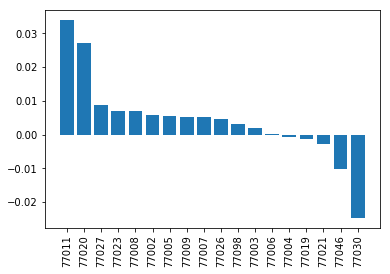

In [253]:
plt.bar(range(len(dict_of_roi)), list(dict_of_roi.values()), align='center')
plt.xticks(range(len(dict_of_roi)), list(dict_of_roi.keys()), rotation = 90)
plt.show()

In [113]:
sorted_dict_of_roi = sorted(dict_of_roi.items(), key = operator.itemgetter(1), reverse = True)

In [95]:
sorted_dict_of_roi

[(77019, array([1895587.05740549])),
 (77024, array([1744002.06530852])),
 (77005, array([1681005.383262])),
 (77027, array([1450289.07179886])),
 (77056, array([1264884.83917508])),
 (77098, array([1062345.14712036])),
 (77006, array([759725.33542674])),
 (77055, array([693449.19213927])),
 (77046, array([662764.93318994])),
 (77007, array([639659.2947131])),
 (77030, array([626667.04806514])),
 (77025, array([575039.02806196])),
 (77079, array([574926.59729283])),
 (77008, array([566724.52241945])),
 (77018, array([562924.31443134])),
 (77094, array([560649.9173858])),
 (77082, array([544963.16947342])),
 (77042, array([543249.95728428])),
 (77057, array([540661.70549098])),
 (77009, array([484011.34289518])),
 (77059, array([471589.02249741])),
 (77081, array([470746.64876845])),
 (77063, array([470085.83824065])),
 (77004, array([436768.44306054])),
 (77096, array([430175.48828398])),
 (77546, array([427744.66568964])),
 (77077, array([421363.29480266])),
 (77041, array([416695.640

In [51]:
lists = sorted(dict_of_roi.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples

type(lists)

list

In [34]:
import matplotlib.pylab as plt



Bad key "text.kerning_factor" on line 4 in
C:\Users\dovu9\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [262]:

top10_cum_increase_price_sqft = filtered_price_sqft_pctchg_cumprod.iloc[-1].sort_values(ascending=True)
top10_cum_increase_price_sqft = top10_cum_increase_price_sqft[-10:]

plot_top10_cum_increase_price_sqft = (top10_cum_increase_price_sqft * 100).hvplot.bar(rot=90).opts(
    title="Top 10 Zip by Cumulative Percent Increase in Price/SqFt 2016 - 2020",
    height=400,
    xlabel='Zip Code',
    ylabel='Percent Increase in Price/SqFt',
    yformatter="%.2f"
)

plot_top10_cum_increase_price_sqft

:Bars   [index]   (47)

In [299]:
top10_sum_permits = filtered_permits_by_zip.sum().sort_values(ascending=True)
top10_sum_permits = top10_sum_permits[-10:]
plot_top10_sum_permits = (top10_sum_permits).hvplot.bar(rot=90).opts(
    title="Top 10 Zips by Construction Permits 2017 - 2020",
    height=400,
    xlabel='Zip Code',
    ylabel='Number Construction Permits',
    yformatter="%.0f"
    #ylim=(-1, 1)
)

plot_top10_sum_permits

:Bars   [index]   (0)

In [271]:
hyplot_avg_price_sqft_by_date = avg_prices['median_listing_price_per_square_feet'].hvplot.line(x='date',y='median_listing_price_per_square_feet',rot=90).opts(
    title="Avg of Median Price/SqFt - Entire Area",
    height=400,
    xlabel='Date',
    ylabel='Avg Price/SqFt',
    xticks=25,
    #yformatter="%.0f",
    #xformatter=x_formatter,
)

hyplot_avg_price_sqft_by_date

:Curve   [date]   (median_listing_price_per_square_feet)

In [267]:
mean_active_listings_by_date = filtered_pricing_data_df.groupby('date')['active_listing_count'].mean()
mean_active_listings_by_date

# calculate min, max, and std of mean_housing_units_per_year 
min_mean_active_listings = mean_active_listings_by_date.min()
max_mean_active_listings = mean_active_listings_by_date.max()
std_mean_active_listings = mean_active_listings_by_date.std()

# Set ylim min and ylim max values based on min/max/std of housing units above for better scale of housing units
ylim_min = min_mean_active_listings - std_mean_active_listings
ylim_max = max_mean_active_listings + std_mean_active_listings

x_formatter = DatetimeTickFormatter(months='%Y%m')

hyplot_active_listings = mean_active_listings_by_date.hvplot.bar(x='date',y='active_listing_count',rot=90).opts(
    title="Overall Active Listings per Month - Entire Area",
    height=400,
    xlabel='Date',
    ylabel='Active Listing',
    #xticks=25,
    #yformatter="%.0f",
    #xformatter=x_formatter,
    ylim=(ylim_min, ylim_max)
)

hyplot_active_listings

:Bars   [date]   (active_listing_count)

In [280]:
filtered_pricing_data_df = pricing_data_df[pricing_data_df['postal_code'].isin(zip_code)]
filtered_pricing_data_df

,month_date_yyyymm,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio,pct_price_change,pct_price_sqft_change
date,,,,,,,,,,,,,,,,,
2016-07-01,201607,77002,"houston, tx",312050.0000,52,88.0,12,0,8,15,253.271422,1266.000000,499723,67,0.2885,0,NaN
2016-08-01,201608,77002,"houston, tx",349050.0000,54,89.5,12,0,12,20,250.615461,1365.500000,505122,74,0.3704,0,-0.010487
2016-09-01,201609,77002,"houston, tx",339050.0000,57,76.5,12,0,8,12,248.215391,1375.500000,476139,69,0.2105,0,-0.009577
2016-10-01,201610,77002,"houston, tx",326050.0000,55,80.0,8,0,4,8,241.769547,1338.000000,439559,63,0.1455,0,-0.025969
2016-11-01,201611,77002,"houston, tx",329050.0000,53,83.0,16,0,4,8,245.061046,1276.500000,425851,61,0.1509,0,0.013614
2016-12-01,201612,77002,"houston, tx",385050.0000,55,56.0,8,0,4,8,278.662420,1178.000000,414624,63,0.1455,0,0.137114
2017-01-01,201701,77002,"houston, tx",335050.0000,54,65.5,16,0,0,5,248.682206,1178.000000,413435,59,0.0926,0,-0.107586
2017-02-01,201702,77002,"houston, tx",320050.0000,47,83.5,12,0,8,10,238.113853,1296.500000,389721,57,0.2128,0,-0.042497
2017-03-01,201703,77002,"houston, tx",335050.0000,56,63.0,16,0,4,11,244.979309,1296.500000,424555,67,0.1964,0,0.028833


In [269]:
avg_prices = filtered_pricing_data_df.groupby('date')['median_listing_price','median_listing_price_per_square_feet'].mean()


In [281]:
plot_df = filtered_pricing_data_df.groupby(['date','postal_code']).mean().reset_index()
plot_df.head()

plot_df.hvplot.line(x='date',y='median_listing_price_per_square_feet', groupby=['postal_code']).opts(
    title='Median Prices/SqFt per Zip Over Time',
    height=400,
    xlabel='Date',
    ylabel='Median Price/SqFt'
)

:DynamicMap   [postal_code]
   :Curve   [date]   (median_listing_price_per_square_feet)

In [304]:
# DROP INDEX ON TAX DF

# filtered_income_tax_df.drop(columns = "index", inplace = True)

income_tax_pctchg = filtered_income_tax_df.pct_change()
income_tax_pctchg.dropna(inplace=True)

income_tax_pctchg_cumprod = (1 + income_tax_pctchg).cumprod() - 1

top10_income_tax_pctchg_cumprod = income_tax_pctchg_cumprod.sum().sort_values(ascending=True)
top10_income_tax_pctchg_cumprod = top10_income_tax_pctchg_cumprod[-10:]


plot_top10_income_tax_pctchg_cumprod = (top10_income_tax_pctchg_cumprod).hvplot.bar(rot=90).opts(
    title="Top 10 Zips by Cumulative Percent Increase in Average Income Tax 2011 - 2015",
    height=400,
    xlabel='Zip Code',
    ylabel='Avg Income Tax Percentage Increase',
    yformatter="%.2f"
    #ylim=(-1, 1)
)

plot_top10_income_tax_pctchg_cumprod


:Bars   [index]   (0)

In [292]:
filtered_average_listing_price_df.drop(columns = "index", inplace = True)

avg_list_price_pctchg = filtered_average_listing_price_df.pct_change()
avg_list_price_pctchg.dropna(inplace=True)


avg_list_price_pctchg_cumprod = (1 + avg_list_price_pctchg).cumprod() - 1
avg_list_price_pctchg_cumprod.fillna(0, inplace=True)
avg_list_price_pctchg_cumprod.replace([np.inf, -np.inf], 0, inplace=True)


top10_avg_list_price_pctchg_cumprod = avg_list_price_pctchg_cumprod.sum().sort_values(ascending=True)
top10_avg_list_price_pctchg_cumprod = top10_avg_list_price_pctchg_cumprod[-10:]



plot_top10_avg_list_price_pctchg_cumprod = (top10_avg_list_price_pctchg_cumprod * 100).hvplot.bar(rot=90).opts(
    title="Top 10 Zips by Cumulative Percent Change in Average Listing Price 2016 - 2020",
    height=400,
    xlabel='Zip Code',
    ylabel='Avg Listing Price Percentage Change',
    yformatter="%.2f"
    #ylim=(-1, 1)
)

plot_top10_avg_list_price_pctchg_cumprod

:Bars   [index]   (0)

In [295]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [297]:
filtered_pricing_data_df.head()

,month_date_yyyymm,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,pending_ratio,pct_price_change,pct_price_sqft_change
date,,,,,,,,,,,,,,,,,
2016-07-01,201607,77002,"houston, tx",312050.0,52,88.0,12,0,8,15,253.271422,1266.0,499723,67,0.2885,0,NaN
2016-08-01,201608,77002,"houston, tx",349050.0,54,89.5,12,0,12,20,250.615461,1365.5,505122,74,0.3704,0,-0.010487
2016-09-01,201609,77002,"houston, tx",339050.0,57,76.5,12,0,8,12,248.215391,1375.5,476139,69,0.2105,0,-0.009577
2016-10-01,201610,77002,"houston, tx",326050.0,55,80.0,8,0,4,8,241.769547,1338.0,439559,63,0.1455,0,-0.025969
2016-11-01,201611,77002,"houston, tx",329050.0,53,83.0,16,0,4,8,245.061046,1276.5,425851,61,0.1509,0,0.013614


In [315]:
for i in zip_code:
    if i in top10_avg_list_price_pctchg_cumprod and i in top10_sum_permits and i in top10_cum_increase_price_sqft and i in top10_income_tax_pctchg_cumprod:
        print (i)
#     elif i in top10_avg_list_price_pctchg_cumprod and i in top10_sum_permits and i in top10_cum_increase_price_sqft:
#         print("hello")
#         print(i)
#     elif i in top10_income_tax_pctchg_cumprod and i in top10_avg_list_price_pctchg_cumprod:
#         print("good")
#         print(i)
    


In [306]:
plot_top10_income_tax_pctchg_cumprod

:Bars   [index]   (0)

In [316]:
# # Create tabs
# tabs = pn.Tabs(
#     ("Correlations", scatter_plot),
#     ("Time Series", bar_plot))
# tabs

# column = pn.Column(
#     '# Allegheny, PA Real Estate Visualizations',
#     '## Sales and Foreclosures',
#     row)
# column

In [323]:
import panel as pn

summary = pn.Column(
    "# We wanted to analyze zip codes within a certain radius, and see which zip code would generate the greatest returns.",
    "# From the availabe data we assumed the top four indicators would be the following:",
    "## Income Tax: With a zipcode of higher income tax, we assume rich would like to live a rich neightborhood.",
    "## Listing Price: Higher listing price should generate more revenue if you can make improvements and sell at a higher value.",
    "## Number of Permits: More permits = more construction = more value in the area",
    "## Percent Increase in Price/Sqft: Higher price = more rent money.",
)

static_plots = pn.Column(
    hyplot_active_listings,
    hyplot_mean_listing_price
)

interactive_plots = pn.Column(
    interactive
)

top_10_zip_codes = pn.Column(
    plot_top10_avg_list_price_pctchg_cumprod,
    plot_top10_income_tax_pctchg_cumprod,
    plot_top10_sum_permits,
    plot_top10_cum_increase_price_sqft
)

conclusion = pn.Column(
    "# In conclusion, we expect zip codes #####, #####, ##### to be the higest ROI's based off of the critierias that we had identified."
)

tabs = pn.Tabs(
    ("Summary", summary),
    ("Active Listings & Average Listing Price", static_plots),
    ("Listing Price by Zip Code", interactive_plots),
    ("Top 10 Zip Codes by Criteria", top_10_zip_codes)
    ("Conclusion", conclusion)
)

In [324]:
summary

Row
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Markdown(str)
    [5] Markdown(str)

In [ ]:
tabs = pn.Tabs(
    Summary with Text
    hvplots
    interactive map
    top 10
    conclusion
    
)